<>:59: SyntaxWarning: invalid escape sequence '\c'
<>:59: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_289068/2687123918.py:59: SyntaxWarning: invalid escape sequence '\c'
  fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')


Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2,  8, 21]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1,  7, 20]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Photon_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Photon_mid <class

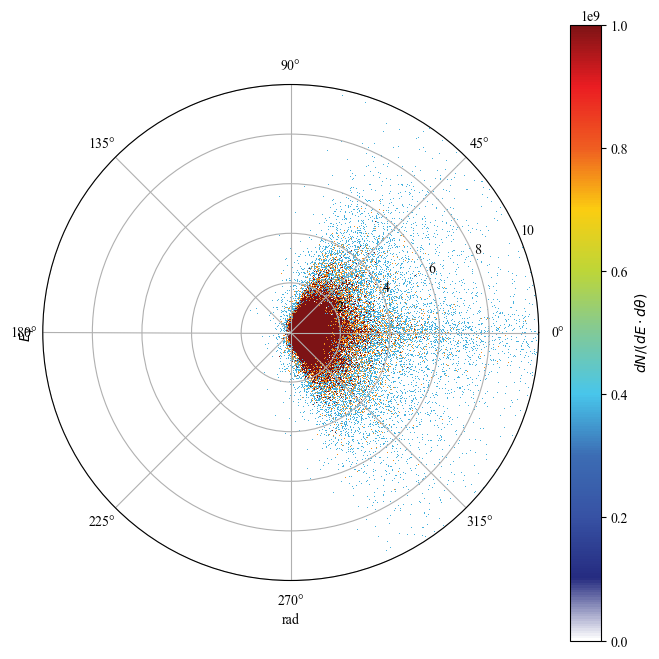

In [20]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap

# ========= 1. 路径与文件设置 =========
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 36
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ========= 2. 读取 SDF 数据 =========
Data = sh.getdata(file_path)
sh.list_variables(Data)

# ========= 3. 获取能量与角度数据 =========
energy_mev = Data.Grid_en_anglexy_Photon.data[0] / 1.6e-13  # eV -> MeV
angle_rad = Data.Grid_en_anglexy_Photon.data[1]             # 角度单位为弧度

# ========= 4. 设置范围与分辨率 =========
dE = np.diff(energy_mev).mean()  # 能量的平均分辨率
dA = np.diff(angle_rad).mean()   # 角度的平均分辨率

# ========= 5. 获取分布函数并归一化 =========
dist_fn = Data.dist_fn_en_anglexy_Photon.data / (dE * dA)

# 创建自定义颜色映射
color_list = [
    (255/255, 255/255, 255/255),  # 白色
    (37/255, 43/255, 128/255),    # 深蓝色
    (55/255, 82/255, 164/255),    # 蓝色
    (60/255, 109/255, 180/255),   # 浅蓝色
    (72/255, 198/255, 235/255),   # 青色
    (129/255, 201/255, 152/255),  # 绿色
    (189/255, 214/255, 56/255),   # 黄绿色
    (251/255, 205/255, 17/255),   # 黄色
    (239/255, 94/255, 33/255),    # 橙色
    (235/255, 29/255, 34/255),    # 红色
    (125/255, 19/255, 21/255)     # 深红色
]

# 创建一个自定义的线性渐变色映射
cmap = LinearSegmentedColormap.from_list("custom_cmap", color_list)

# 创建极坐标图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# 将二维数据转为极坐标中的 r 和 theta 数据
theta, r = np.meshgrid(angle_rad, energy_mev)  # 生成网格

# 绘制热图，并设置颜色条的范围
c = ax.pcolormesh(theta, r, dist_fn, shading='auto', cmap=cmap, vmin=0, vmax=1e9)#

# 添加颜色条
fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')

# 设置标题和标签
# ax.set_title('Energy Distribution in Polar Coordinates')
ax.set_xlabel('rad')
ax.set_ylabel('$E_\\gamma$')

# ax.set_xlim(-0.75,0.75)
ax.set_ylim(0,10)

plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_289068/2282592171.py:16: SyntaxWarning: invalid escape sequence '\c'
  fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')


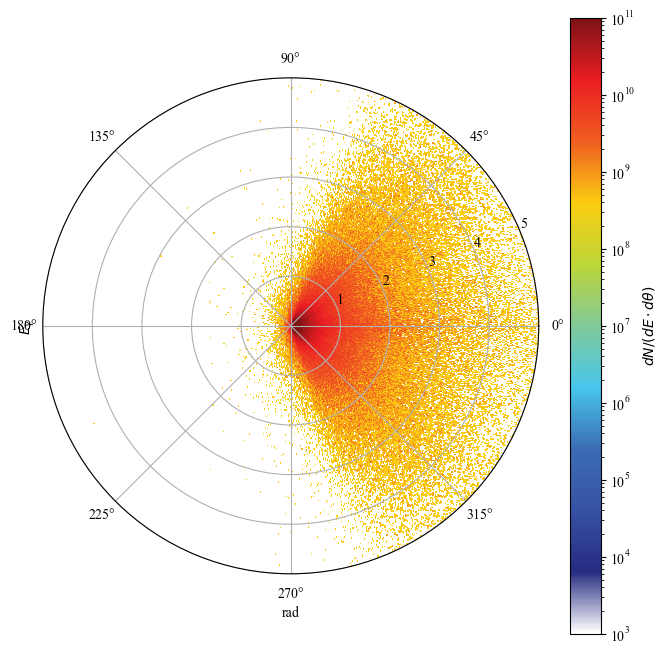

In [21]:
# 导入 LogNorm
from matplotlib.colors import LogNorm

# 创建极坐标图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# 将二维数据转为极坐标中的 r 和 theta 数据
theta, r = np.meshgrid(angle_rad, energy_mev)  # 生成网格

# 绘制热图，并设置颜色条的范围
# 使用 LogNorm 来设置对数色标
c = ax.pcolormesh(theta, r, dist_fn, shading='auto', cmap=cmap, norm=LogNorm(vmin=1e3, vmax=1e11))

# 添加颜色条
fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')

# 设置标题和标签
# ax.set_title('Energy Distribution in Polar Coordinates')
ax.set_xlabel('rad')
ax.set_ylabel('$E_\\gamma$')

# ax.set_xlim(-0.75,0.75)
ax.set_ylim(0,5)

plt.show()

<>:59: SyntaxWarning: invalid escape sequence '\c'
<>:59: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_289068/3479634437.py:59: SyntaxWarning: invalid escape sequence '\c'
  fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')


Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/10kev25磁场/distfun0036.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  1, 50]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 4,  2, 51]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 3,  1, 50]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class '

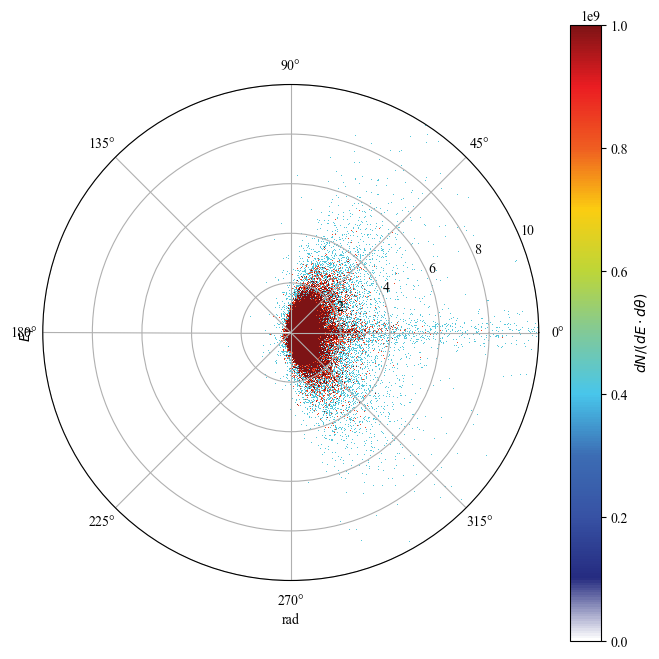

In [22]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap

# ========= 1. 路径与文件设置 =========
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/10kev25磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 36
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# ========= 2. 读取 SDF 数据 =========
Data = sh.getdata(file_path)
sh.list_variables(Data)

# ========= 3. 获取能量与角度数据 =========
energy_mev = Data.Grid_en_anglexy_Photon.data[0] / 1.6e-13  # eV -> MeV
angle_rad = Data.Grid_en_anglexy_Photon.data[1]             # 角度单位为弧度

# ========= 4. 设置范围与分辨率 =========
dE = np.diff(energy_mev).mean()  # 能量的平均分辨率
dA = np.diff(angle_rad).mean()   # 角度的平均分辨率

# ========= 5. 获取分布函数并归一化 =========
dist_fn = Data.dist_fn_en_anglexy_Photon.data / (dE * dA)

# 创建自定义颜色映射
color_list = [
    (255/255, 255/255, 255/255),  # 白色
    (37/255, 43/255, 128/255),    # 深蓝色
    (55/255, 82/255, 164/255),    # 蓝色
    (60/255, 109/255, 180/255),   # 浅蓝色
    (72/255, 198/255, 235/255),   # 青色
    (129/255, 201/255, 152/255),  # 绿色
    (189/255, 214/255, 56/255),   # 黄绿色
    (251/255, 205/255, 17/255),   # 黄色
    (239/255, 94/255, 33/255),    # 橙色
    (235/255, 29/255, 34/255),    # 红色
    (125/255, 19/255, 21/255)     # 深红色
]

# 创建一个自定义的线性渐变色映射
cmap = LinearSegmentedColormap.from_list("custom_cmap", color_list)

# 创建极坐标图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# 将二维数据转为极坐标中的 r 和 theta 数据
theta, r = np.meshgrid(angle_rad, energy_mev)  # 生成网格

# 绘制热图，并设置颜色条的范围
c = ax.pcolormesh(theta, r, dist_fn, shading='auto', cmap=cmap, vmin=0, vmax=1e9)#

# 添加颜色条
fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')

# 设置标题和标签
# ax.set_title('Energy Distribution in Polar Coordinates')
ax.set_xlabel('rad')
ax.set_ylabel('$E_\\gamma$')

# ax.set_xlim(-0.75,0.75)
ax.set_ylim(0,10)

plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_289068/2282592171.py:16: SyntaxWarning: invalid escape sequence '\c'
  fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')


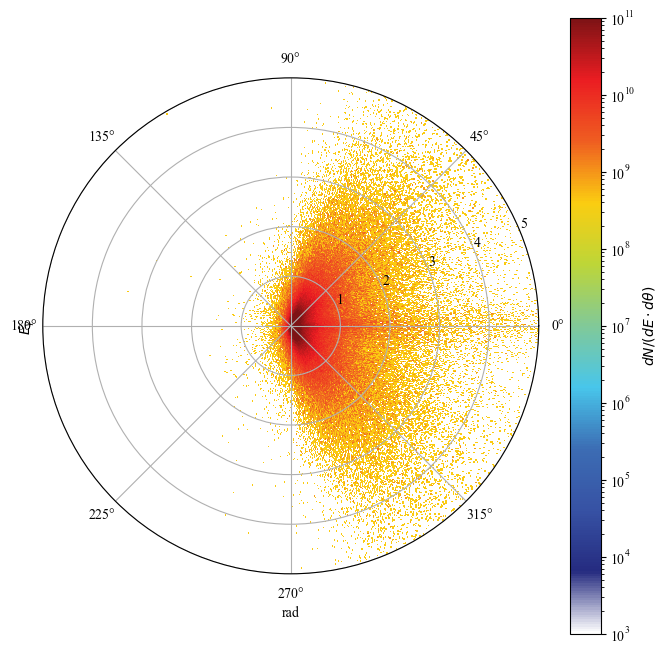

In [23]:
# 导入 LogNorm
from matplotlib.colors import LogNorm

# 创建极坐标图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# 将二维数据转为极坐标中的 r 和 theta 数据
theta, r = np.meshgrid(angle_rad, energy_mev)  # 生成网格

# 绘制热图，并设置颜色条的范围
# 使用 LogNorm 来设置对数色标
c = ax.pcolormesh(theta, r, dist_fn, shading='auto', cmap=cmap, norm=LogNorm(vmin=1e3, vmax=1e11))

# 添加颜色条
fig.colorbar(c, ax=ax, label='$dN/(dE \cdot d\\theta)$')

# 设置标题和标签
# ax.set_title('Energy Distribution in Polar Coordinates')
ax.set_xlabel('rad')
ax.set_ylabel('$E_\\gamma$')

# ax.set_xlim(-0.75,0.75)
ax.set_ylim(0,5)

plt.show()

Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2,  8, 21]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1,  7, 20]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Photon_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Photon_mid <class

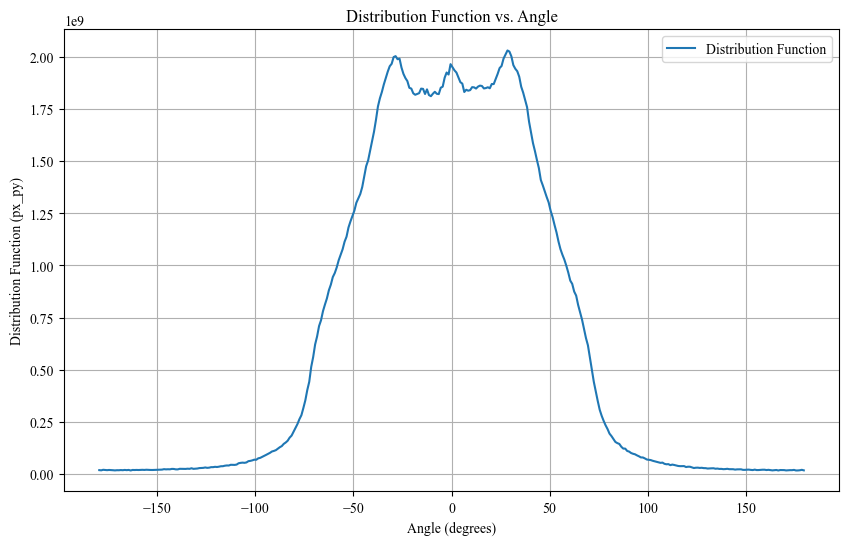

In [29]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'
file_prefix = 'distfun'
file_suffix = '.sdf'

# 只处理文件 0009.sdf
file_index = 36
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"  # 使用格式化字符串生成文件名
file_path = os.path.join(base_path, file_name)

# 读取数据
Data = sh.getdata(file_path)
sh.list_variables(Data)

# 获取角度数据（假设单位是弧度）
angle_rad = Data.Grid_angle_xy_Photon.data[0]

# 将弧度转换为角度
angle_deg = np.degrees(angle_rad)

# 获取分布函数数据
px_py = Data.dist_fn_angle_xy_Photon.data

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(angle_deg, px_py, label='Distribution Function')
plt.xlabel('Angle (degrees)')
plt.ylabel('Distribution Function (px_py)')
plt.title('Distribution Function vs. Angle')
# plt.xlim(-0,)
plt.legend()
plt.grid(True)
plt.show()